In [1]:
import joblib
import matplotlib.pyplot as plt
import os as os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
# carichiamo il dataframe

df_class= joblib.load('df_classif_posiz_processato.joblib')

In [4]:

# suddividiamo il dataset in features (X) e target (y), il nostro target è solo i valore della posizione 
X = df_class.drop("position", axis=1)
y = df_class["position"]
 
# suddividiamo il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# facciamo un primo confronto indicativo tra i modelli
# Modelli
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42),
    "AdaBoost": AdaBoostClassifier(learning_rate=1.0, n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42),
    "Logistic Regression": LogisticRegression(C=0.1, random_state=42),
    "Linear SVC": LinearSVC(C=1, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50), random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

target_names = ['Difensore', 'Centrocampista', 'Attaccante' ]
# Creazione di una lista per memorizzare i risultati del classification report
classific_report = []

# Esegui la k-fold cross-validation per ogni modello
for model_name, model in models.items():
    # Calcola le predizioni durante la cross-validation
    y_pred = cross_val_predict(model, X, y, cv=5)

    scores = cross_val_score(model, X, y, cv=5)
    mean_score = scores.mean()


    # Calcola il classification report
    classification_report_result = classification_report(y, y_pred, output_dict=True, target_names=target_names)

    classification_report_result['model'] = model_name
    classification_report_result['score'] = mean_score
 
    # Aggiungi il risultato alla lista
    classific_report.append(classification_report_result)
 
# Stampa la tabella dei risultati
for result in classific_report:
    model_name = result.pop('model')  # Rimuovi il nome del modello dalla struttura dati
    print(f"Classification Report for {model_name}:\n")
    print(pd.DataFrame(result).transpose(),"\n")
    print(f"Cross Validation score {mean_score}:\n")
    print("\n")
 
# Se desideri salvare i risultati in un DataFrame pandas
results_df = pd.DataFrame(classific_report)

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Classification Report for Decision Tree:

                precision    recall  f1-score       support
Difensore        0.746800  0.739399  0.743081   6155.000000
Centrocampista   0.536084  0.543898  0.539963   5900.000000
Attaccante       0.678357  0.675382  0.676866   5699.000000
accuracy         0.653881  0.653881  0.653881      0.653881
macro avg        0.653747  0.652893  0.653303  17754.000000
weighted avg     0.654805  0.653881  0.654326  17754.000000
score            0.653878  0.653878  0.653878      0.653878 

Cross Validation score 0.5700636123131353:



Classification Report for Random Forest:

                precision    recall  f1-score       support
Difensore        0.776426  0.767344  0.771858   6155.000000
Centrocampista   0.581615  0.564068  0.572707   5900.000000
Attaccante       0.699277  0.729953  0.714286   5699.000000
accuracy         0.687789  0.687789  0.687789      0.687789
macro avg        0.685773  0.687121  0.686284  17754.000000
weighted avg     0.686922  0

In [11]:
# andiamo a fare una prima valutazione tra i modelli, andando a confrontare l accuracy
# Modelli
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42),
    "AdaBoost": AdaBoostClassifier(learning_rate=1.0, n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42),
    "Logistic Regression": LogisticRegression(C=0.1, random_state=42),
    "Linear SVC": LinearSVC(C=1, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(50, 50), random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

# Creazione di una lista per memorizzare i risultati dell'accuracy
accuracy_results = []

# Esegui la k-fold cross-validation per ogni modello
for model_name, model in models.items():
    # Calcola le predizioni durante la cross-validation
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Calcola l'accuracy
    accuracy = accuracy_score(y, y_pred)

    # Aggiungi il risultato all lista
    accuracy_results.append({"Model": model_name, "Accuracy": accuracy})
 
# Stampa l'accuracy per ogni modello
for result in accuracy_results:
    model_name = result["Model"]
    accuracy = result["Accuracy"]
    print(f"Accuracy: --> {accuracy:.4f} for {model_name}. ")
 
# Se desideri salvare i risultati in un DataFrame pandas
accuracy_df = pd.DataFrame(accuracy_results)

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Accuracy: --> 0.6539 for Decision Tree. 
Accuracy: --> 0.6878 for Random Forest. 
Accuracy: --> 0.6820 for AdaBoost. 
Accuracy: --> 0.6910 for Gradient Boosting. 
Accuracy: --> 0.6734 for Logistic Regression. 
Accuracy: --> 0.4857 for Linear SVC. 
Accuracy: --> 0.5950 for MLP Classifier. 
Accuracy: --> 0.6221 for Linear Discriminant Analysis. 
Accuracy: --> 0.5701 for Quadratic Discriminant Analysis. 


In [6]:

# adesso andiamo a fare hyperparameter tuning sui migliori 3 modelli

models_and_params = {
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 150], 
        'max_depth': [None, 5, 10], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4], 
        'criterion': ['gini', 'entropy']}),
    "AdaBoost": (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 150], 
        'learning_rate': [0.01, 0.1, 1.0], 
        'algorithm': ['SAMME', 'SAMME.R']}),
    "Gradient Boosting": (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 150], 
        'learning_rate': [0.01, 0.1, 1.0], 
        'max_depth': [3, 5, 7], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4]})
}
 
# Esegui la k-fold cross-validation con ricerca degli iperparametri per ogni modello
for model_name, (model, param_grid) in models_and_params.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X, y)
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Best Cross-Validation Score: {grid_search.best_score_}\n")

Random Forest Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Best Cross-Validation Score: 0.6888552560080279

AdaBoost Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}
AdaBoost Best Cross-Validation Score: 0.6820404171013125

Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Gradient Boosting Best Cross-Validation Score: 0.6927983309601342



In [28]:
# stampiamo il classfication report per ciascun modello

model = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=100, min_samples_leaf=2, min_samples_split=5)

# Calcola le predizioni durante la cross-validation
y_pred = cross_val_predict(model, X, y, cv=5)

# Calcola il classification report
classification_report_result = classification_report(y, y_pred, output_dict=True, target_names=['Difensore', 'Centrocampista', 'Attaccante'])

del classification_report_result['accuracy']

classification_report_df = pd.DataFrame(classification_report_result).transpose()
classification_report_df = classification_report_df.reindex(['Difensore', 'Centrocampista', 'Attaccante', '', 'macro avg', 'weighted avg']).fillna(' ')


print(f"Classification Report for Random Forest:\n")
print(classification_report_df.loc[:'weighted avg'])

# Stampa uno spazio vuoto
print("\n")

# Calcola l'accuracy generale
accuracy = accuracy_score(y, y_pred)

# Stampa l'accuracy separatamente
print(f"accuracy:        {accuracy:.4f}\n")

Classification Report for Random Forest:

               precision    recall  f1-score  support
Difensore       0.777852  0.760032  0.768839   6155.0
Centrocampista   0.57685   0.56678  0.571771   5900.0
Attaccante      0.697291  0.727145  0.711905   5699.0
                                                     
macro avg       0.683998  0.684652  0.684172  17754.0
weighted avg    0.685195  0.685254  0.685074  17754.0


accuracy:        0.6853



In [34]:
# per la stampa del report
model = AdaBoostClassifier(learning_rate=1.0, n_estimators=100, algorithm= 'SAMME.R')


# Calcola le predizioni durante la cross-validation
y_pred = cross_val_predict(model, X, y, cv=5)

# Calcola il classification report
classification_report_result = classification_report(y, y_pred, output_dict=True, target_names=['Difensore', 'Centrocampista', 'Attaccante'])

del classification_report_result['accuracy']

classification_report_df = pd.DataFrame(classification_report_result).transpose()
classification_report_df = classification_report_df.reindex(['Difensore', 'Centrocampista', 'Attaccante', '', 'macro avg', 'weighted avg']).fillna(' ')
print(f"Classification Report for AdaBoost Classifier:\n")
print(classification_report_df.loc[:'weighted avg'])

# Stampa uno spazio vuoto
print("\n")

# Calcola l'accuracy generale
accuracy = accuracy_score(y, y_pred)

# Stampa l'accuracy separatamente
print(f"accuracy:        {accuracy:.4f}\n")

Classification Report for AdaBoost Classifier:

               precision    recall  f1-score  support
Difensore       0.761024  0.782291  0.771511   6155.0
Centrocampista  0.570093  0.537627  0.553385   5900.0
Attaccante      0.703053  0.723285  0.713025   5699.0
                                                     
macro avg       0.678057  0.681068  0.679307  17754.0
weighted avg    0.678966  0.682043   0.68025  17754.0


accuracy:        0.6820



In [33]:
# per la stampa del report

model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, min_samples_leaf=4, min_samples_split=5)


# Calcola le predizioni durante la cross-validation
y_pred = cross_val_predict(model, X, y, cv=5)

# Calcola il classification report
classification_report_result = classification_report(y, y_pred, output_dict=True, target_names=['Difensore', 'Centrocampista', 'Attaccante'])

del classification_report_result['accuracy']

classification_report_df = pd.DataFrame(classification_report_result).transpose()
classification_report_df = classification_report_df.reindex(['Difensore', 'Centrocampista', 'Attaccante', '', 'macro avg', 'weighted avg']).fillna(' ')
print(f"Classification Report for Gradient Boosting Classifier:\n")
print(classification_report_df.loc[:'weighted avg'])

# Stampa uno spazio vuoto
print("\n")

# Calcola l'accuracy generale
accuracy = accuracy_score(y, y_pred)

# Stampa l'accuracy separatamente
print(f"accuracy:        {accuracy:.4f}\n")

Classification Report for Gradient Boosting Classifier:

               precision    recall  f1-score  support
Difensore       0.783047  0.769943   0.77644   6155.0
Centrocampista  0.585353  0.577119  0.581207   5900.0
Attaccante      0.706202  0.729251  0.717541   5699.0
                                                     
macro avg       0.691534  0.692104  0.691729  17754.0
weighted avg    0.692682  0.692802  0.692654  17754.0


accuracy:        0.6928



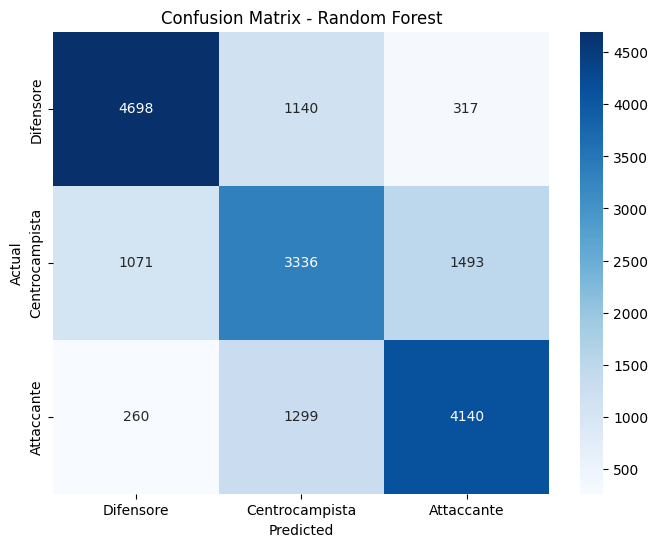

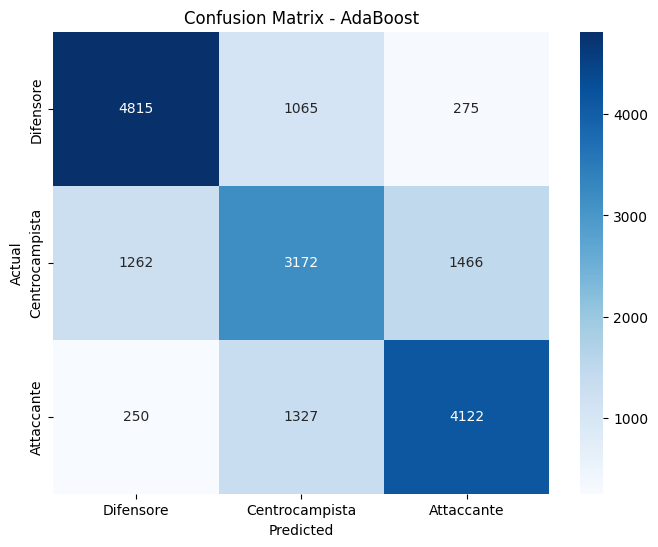

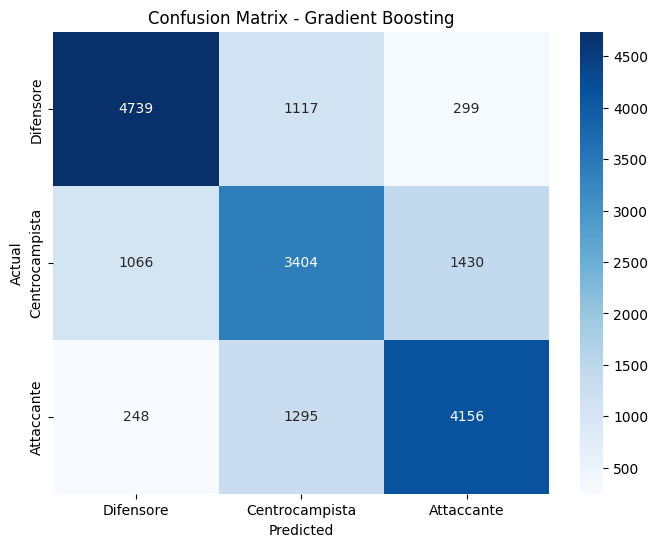

In [37]:

# andiamo a visualizzare le matrici di cosnfusione 

# Modelli
models = {
    "Random Forest": RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=100, min_samples_leaf=2, min_samples_split=5),
    "AdaBoost": AdaBoostClassifier(learning_rate=1.0, n_estimators=100, algorithm='SAMME.R'),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, min_samples_leaf=4, min_samples_split=5 )
}

 
# Esegui la k-fold cross-validation per ogni modello
for model_name, model in models.items():
    # Calcola le predizioni durante la cross-validation
    y_pred = cross_val_predict(model, X, y, cv=5)
 
    # Calcola la confusion matrix
    cm = confusion_matrix(y, y_pred)
 
    # Crea una heatmap per la confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()